# Analyzing the Rule coverage of automated loan approval decisions
## Analyzing your business decisions in Python with Panda and Brunel

This Python 3.5 notebook shows how to load a rule coverage produced by IBM ODM for a decision set. You learn how to apply analytics with Brunel library to get insights on your automated decisions.
The decision set has been automated by running business rules on randomly generated loan applications. The rule execution statistics have been written in a CSV format. 

This notebook has been developed with a Panda dataframe and runs on Spark 2.1. 

The intent of applying data science on decisions is to check that decision automation works as expected. In other words, we want to check that the executed rules fit well with the segmentation of the data. From there we will potentialy find optimizations to better automate your decision making. You will be able to extend the notebook to create new views on your decisions by using Panda dataframes and Brunel visualization capabilities.
    
To get the most out of this notebook, you should have some familiarity with the Python programming language.

## Contents 
This notebook contains the following main sections:

1. [Load the loan validation coverage.](#overview)
2. [View an approval distribution pie chart.](#viewapprovaldistribution)
3. [View the income on loan amount distribution.](#incomeoncreditscoredistribution)
4. [View the loan amount on credit score distribution.](#viewamountdistribution)
5. [Summary and next steps.](#next)    

<a id="overview"></a>
## 1. Load the Loan Validation decision set.
The loan validation dataset has been generated with Operational Decision Manager as a CSV file.
The following code accesses to this dataset file to construct a dataframe of simple processed loan applications.

In [1]:
from io import StringIO

import requests
import json
import pandas as pd
import brunel

df = pd.read_csv("https://raw.githubusercontent.com/ODMDev/decisions-on-spark/master/data/loanvalidation/1K/loanvalidation-rulecoverage-1K.csv")
decisionCount = 1000
df

,Rule,Count
0,computation.rate.7,0
1,computation.salary2score.5,43
2,insurance.insurance.8,3
3,computation.rate.10,0
4,insurance.insurance.11,57
5,computation.rate.21,0
6,insurance.insurance.6,45
7,computation.rate.18,0
8,computation.salary2score.3,6
9,insurance.insurance.2,29


A dataframe has been created to capture 1000 loan application decisions automated with business rules. Business rules have been used to determine eligibility based credit score, loan amount, income to debt ratio. Decision outcomes are represented by the approval and yearlyReplayment columns.

Table above represents a rule coverage. Each row shows a business rule with its execution count. Rule name conventions is: 
   * packageName.ruleName
   * packageName.decisionTable.line
     
By example computation.rate.10 means the 10th line of the decision table named "rate" in the "computation" package.

In [2]:
df['Percentage']= (df['Count']*100)/decisionCount
df

,Rule,Count,Percentage
0,computation.rate.7,0,0.0
1,computation.salary2score.5,43,4.3
2,insurance.insurance.8,3,0.3
3,computation.rate.10,0,0.0
4,insurance.insurance.11,57,5.7
5,computation.rate.21,0,0.0
6,insurance.insurance.6,45,4.5
7,computation.rate.18,0,0.0
8,computation.salary2score.3,6,0.6
9,insurance.insurance.2,29,2.9


<a id="loanamountoncreditscoredistribution"></a>
## 2.View the rule coverage distribution
You visualize the rule execution statistics metered when running a decision service. From these statistics you get insights on:
- the rules that are never executed. Rules can be never executed against a data set when their conditions are never met. Typically if they are triggered for specific cases that don't appear in your data set. Otherwise have a deeper look to your rules and dataset.
- the rules that are always executed. Common case is a rule that checks the compliance of input parameters. But if you see a rule that should only triggered on a subset of the requests and is reported with a 100% then check its conditions and the request set.

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


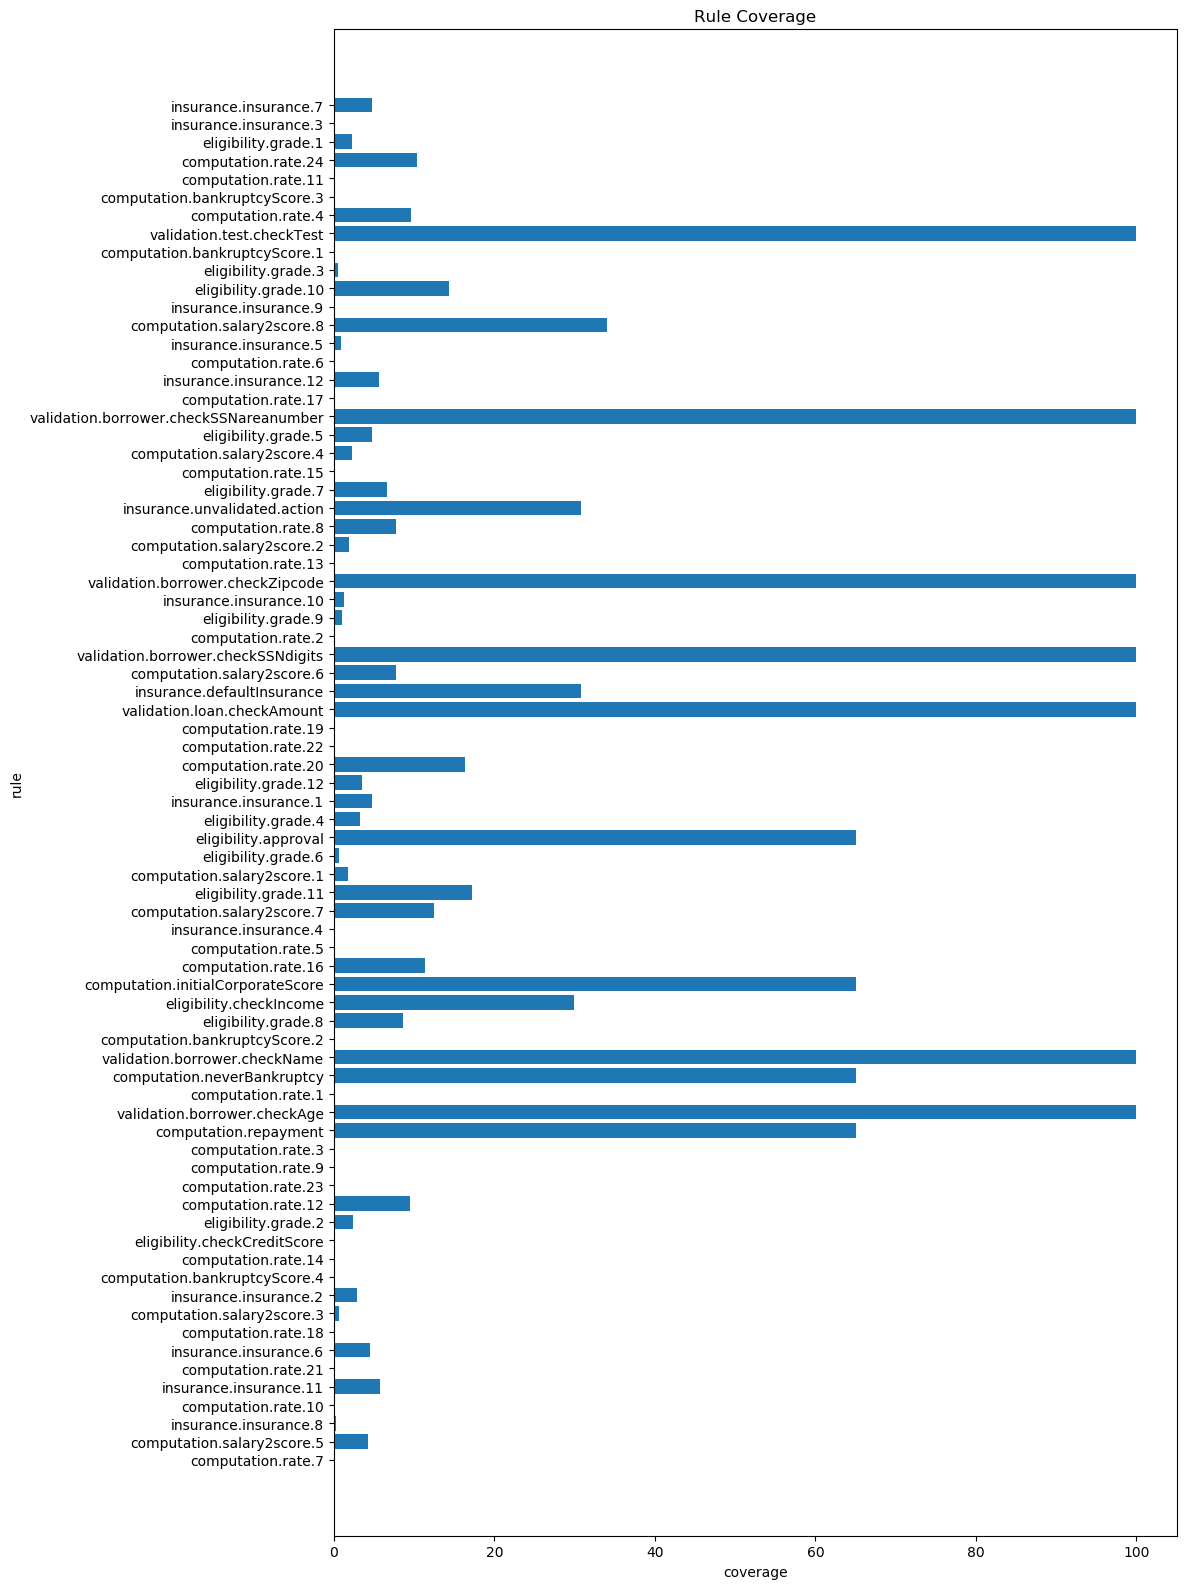

In [5]:
from matplotlib import rcParams
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 10})

plt.figure(figsize=(12, 16))
#plt.yscale('log', nonposy='clip')

rules = df['Rule']
percentages = df['Percentage']
counts = df['Count']
y_pos = np.arange(len(rules))

plt.barh(y_pos, percentages, align='center')
plt.yticks(y_pos, rules)
plt.xlabel('percentage')
plt.title('Rule Coverage')
plt.ylabel('rule')
plt.savefig('rulecoverage.jpg')
plt.show()

In [22]:
%brunel data('df') bar x(rule) y(count) color(count:yellow-green) :: width=700, height=400

<IPython.core.display.Javascript object>

<a id="overview"></a>
## 3. What are the rules never executed.
Let see the list of rules that were never executed in your decision set.

In [23]:
total_rows = df.shape[0]
print("The number of business rules is " + str(total_rows))

neverExecutedRules = df.loc[df['Count'] == 0]
total_executed = neverExecutedRules.shape[0]
print("Number of never executed business rules: " + str(total_executed))
print("Never executed business rules list: ")
neverExecutedRules

The number of business rules is 75
Number of never executed business rules: 24
Never executed business rules list: 


,Rule,Count
0,computation.rate.7,0
3,computation.rate.10,0
5,computation.rate.21,0
7,computation.rate.18,0
10,computation.bankruptcyScore.4,0
11,computation.rate.14,0
12,eligibility.checkCreditScore,0
15,computation.rate.23,0
16,computation.rate.9,0
17,computation.rate.3,0


<a id="overview"></a>
## 4. What are the rules always executed.
Let see the list of rules that were always executed in your decision set.

In [24]:
alwaysExecutedRules = df.loc[df['Count'] == decisionCount]
total_executed = alwaysExecutedRules.shape[0]
print("Number of always executed business rules: " + str(total_executed))
print("Always executed business rules list: ")
alwaysExecutedRules

Number of always executed business rules: 7
Always executed business rules list: 


,Rule,Count
19,validation.borrower.checkAge,1000
22,validation.borrower.checkName,1000
41,validation.loan.checkAmount,1000
44,validation.borrower.checkSSNdigits,1000
48,validation.borrower.checkZipcode,1000
57,validation.borrower.checkSSNareanumber,1000
67,validation.test.checkTest,1000


All these rules check the input parameters and are expected to be triggered for every request. Observing a rule executed 100% of the cases but supposed to apply to a minority of decisions would imply a deeper look. You will investigate the conditions of the rule, that may to open for the pattern that you intend to match. Additionaly you will look at your request set to make sure that it covers the use cases that you expect to cover. 

<a id="next"></a>
# Summary and next steps
You have manipulated a rule coverage dataframe coming from a decision set powered by IBM ODM. You have seen how to exploit this coverage to get insights on your decision logic and request data set. You can expand this notebook by adapting the views and adding new ones to get more perspectives about your decisions, and make better decisions in the future.

<a id="authors"></a>
## Authors

Pierre Feillet is engineer at the IBM Decision Lab. Pierre is architect in decision automation, and is passionate about data science and machine learning.

Copyright © 2018 IBM. This notebook and its source code are released under the terms of the MIT License.